In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr





In [26]:
#import dataset
creep_df = pd.read_csv('../Data/Ti_alloys_dataset.csv')
creep_df

,Al,V,Fe,Mo,N,Solution treated temp(cel),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),steady state strain rate (1/s),Strain to rupture (%) (Efc),stress,creep_rupture_life
0,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,3.240000e-06,14.76,319.0,0.012
1,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,4.400000e-05,14.76,250.0,0.030
2,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,500,4.430000e-05,14.76,520.0,0.046
3,6.00,4.00,0.400,0.657,0.050,403.56,551.17,5.01,600,3.520000e-04,26.58,319.0,0.090
4,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,2.550000e-05,14.76,222.0,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,6.00,4.00,0.250,0.657,0.050,403.56,900.00,2.00,475,2.550000e-08,14.22,300.0,750.000
122,6.20,3.03,0.386,2.000,0.004,1050.00,550.00,24.00,520,1.000000e-05,14.76,310.0,750.000
123,6.20,3.03,0.386,2.000,0.004,900.00,580.00,8.00,520,1.200000e-04,14.76,310.0,1160.000
124,6.51,4.08,0.160,0.657,0.005,403.56,940.00,4.00,455,9.160000e-07,14.76,379.0,1619.000


In [27]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Al                               126 non-null    float64
 1   V                                126 non-null    float64
 2   Fe                               126 non-null    float64
 3   Mo                               126 non-null    float64
 4   N                                126 non-null    float64
 5   Solution treated temp(cel)       126 non-null    float64
 6   Anneal temp (cel)                126 non-null    float64
 7   Annealing Time (hour)            126 non-null    float64
 8   Temperature of creep test (cel)  126 non-null    int64  
 9   steady state strain rate (1/s)   126 non-null    float64
 10  Strain to rupture (%) (Efc)      126 non-null    float64
 11  stress                           126 non-null    float64
 12  creep_rupture_life    

In [28]:
features = creep_df.iloc[:, 0:12]
targets = np.log10(creep_df.iloc[:, 12])
features

,Al,V,Fe,Mo,N,Solution treated temp(cel),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),steady state strain rate (1/s),Strain to rupture (%) (Efc),stress
0,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,3.240000e-06,14.76,319.0
1,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,4.400000e-05,14.76,250.0
2,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,500,4.430000e-05,14.76,520.0
3,6.00,4.00,0.400,0.657,0.050,403.56,551.17,5.01,600,3.520000e-04,26.58,319.0
4,6.61,4.23,1.180,0.657,0.011,403.56,551.17,5.01,600,2.550000e-05,14.76,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,6.00,4.00,0.250,0.657,0.050,403.56,900.00,2.00,475,2.550000e-08,14.22,300.0
122,6.20,3.03,0.386,2.000,0.004,1050.00,550.00,24.00,520,1.000000e-05,14.76,310.0
123,6.20,3.03,0.386,2.000,0.004,900.00,580.00,8.00,520,1.200000e-04,14.76,310.0
124,6.51,4.08,0.160,0.657,0.005,403.56,940.00,4.00,455,9.160000e-07,14.76,379.0


In [29]:
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
from pyro.infer import Predictive
from pyro.infer import MCMC, NUTS

class BNN(PyroModule):
    def __init__(self, in_dim=12, out_dim=1, hid_dim=10, n_hid_layers=5, prior_scale=5.):
        super().__init__()

        self.activation = nn.Tanh()  # could also be ReLU or LeakyReLU
        assert in_dim > 0 and out_dim > 0 and hid_dim > 0 and n_hid_layers > 0  # make sure the dimensions are valid

        # Define the layer sizes and the PyroModule layer list
        self.layer_sizes = [in_dim] + n_hid_layers * [hid_dim] + [out_dim]
        layer_list = [PyroModule[nn.Linear](self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = PyroModule[torch.nn.ModuleList](layer_list)

        for layer_idx, layer in enumerate(self.layers):
            layer.weight = PyroSample(dist.Normal(0., prior_scale * np.sqrt(2 / self.layer_sizes[layer_idx])).expand(
                [self.layer_sizes[layer_idx + 1], self.layer_sizes[layer_idx]]).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., prior_scale).expand([self.layer_sizes[layer_idx + 1]]).to_event(1))

    def forward(self, x, y=None):
        # x = x.reshape(-1, 1)
        x = self.activation(self.layers[0](x))  # input --> hidden
        for layer in self.layers[1:-1]:
            x = self.activation(layer(x))  # hidden --> hidden
        mu = self.layers[-1](x).squeeze()  # hidden --> output
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # infer the response noise

        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)
        return mu

# Coverage
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

Run # 1 Fold # 1


Sample: 100%|██████████| 200/200 [01:31,  2.19it/s, step size=2.29e-02, acc. prob=0.941]

Pearson CC: 0.721688356323098
R2 score: 0.48978406578675604
RMSE: 1.0612120803881775
MAE: 0.8973947901472228
Coverage: 96.15384615384613
Interval Width: 3.5438668727874756
Composite Metric: 0.7916982568143287



c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

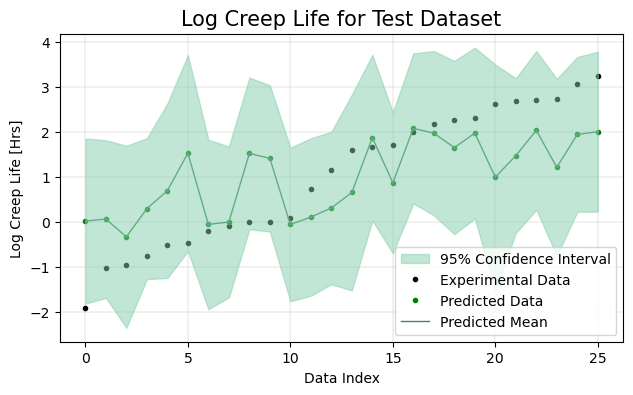

c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

********************
Run # 1 Fold # 2


Sample: 100%|██████████| 200/200 [04:25,  1.33s/it, step size=3.48e-03, acc. prob=0.967]

Pearson CC: 0.945234483272005
R2 score: 0.8816117537375484
RMSE: 0.4113944324882833
MAE: 0.32124251684024635
Coverage: 100.0
Interval Width: 1.7675083875656128
Composite Metric: 0.8914420444953728



c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

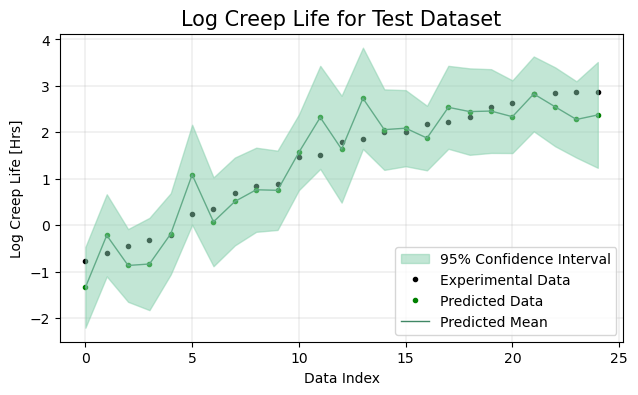

c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

********************
Run # 1 Fold # 3


Sample: 100%|██████████| 200/200 [05:20,  1.60s/it, step size=3.59e-03, acc. prob=0.962]

Pearson CC: 0.954118715827063
R2 score: 0.8979353269052559
RMSE: 0.41710584654121385
MAE: 0.3208382278231522
Coverage: 96.0
Interval Width: 1.52394437789917
Composite Metric: 0.8840479820822836



c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

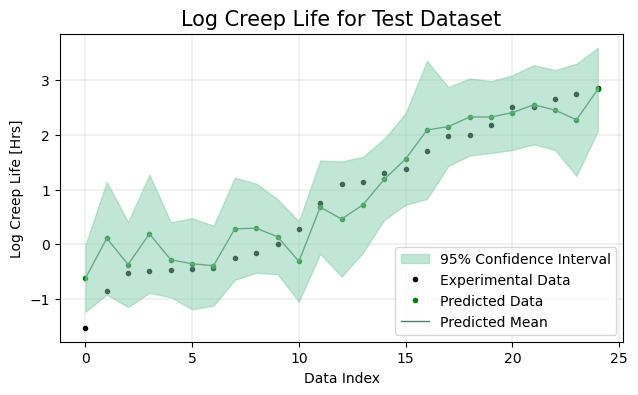

c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

********************
Run # 1 Fold # 4


Sample: 100%|██████████| 200/200 [04:41,  1.41s/it, step size=4.88e-03, acc. prob=0.929]

Pearson CC: 0.9705569334067993
R2 score: 0.9338362608010956
RMSE: 0.3069027160309385
MAE: 0.23889510268000888
Coverage: 96.0
Interval Width: 1.7174115180969238
Composite Metric: 0.86556790691437



c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

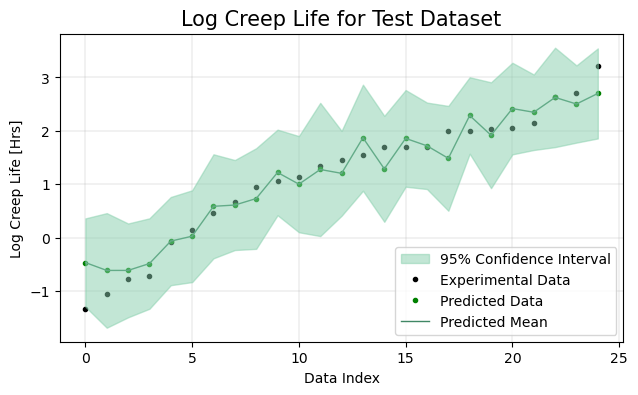

c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future

********************
Run # 1 Fold # 5


Sample: 100%|██████████| 200/200 [05:29,  1.65s/it, step size=4.37e-03, acc. prob=0.962]

Pearson CC: 0.9183579294038777
R2 score: 0.8353067085039975
RMSE: 0.3919638392204262
MAE: 0.30257027157483213
Coverage: 96.0
Interval Width: 1.7400360107421875
Composite Metric: 0.8636751874424519



c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\longz\anaconda3\envs\pytorchcpu\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

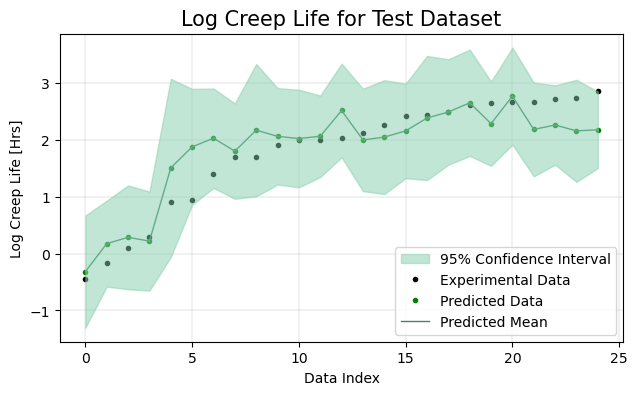

********************


In [30]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)


test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            # normalized features to the [0,1] range
            scaler = MinMaxScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)

            # define DNN
            model = BNN(hid_dim=10, n_hid_layers=3, prior_scale=1)
            nuts_kernel = NUTS(model, jit_compile=False)
            mcmc = MCMC(nuts_kernel, num_samples=100)
            mcmc.run(torch.Tensor(x_train), torch.Tensor(y_train.to_numpy()))

            # evaluate the model on test data
            predictive = Predictive(model=model, posterior_samples=mcmc.get_samples())
            preds = predictive(torch.Tensor(x_test))

            y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
            y_std = preds['obs'].T.detach().numpy().std(axis=1)
            
            iteration_list = [i for i in range(len(y_test))]


            ## Metrics for evaluating the predictive accuracy of the model
            PearsonCC[j, i] = pearsonr(y_test, np.squeeze(y_pred))[0]
            R2_score[j, i] = r2_score(y_test, y_pred)
            RMSE[j, i] = np.sqrt(mean_squared_error(y_pred, y_test))
            MAE[j, i] = np.mean(abs(y_pred-np.array(y_test)))


            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
      

            ## Metrics for evaluating the uncertainty quantification of the model
            # Coverage
            df_test_low = y_pred - 2*y_std
            df_test_mean = y_pred
            df_test_high = y_pred + 2*y_std
            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)
            print(f'Coverage: {test_coverage[j, i]}')


            # Prediction interval width
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')

            ## Uncertainty quantification plot
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            ax[0].fill_between(iteration_list, y_pred - 2*y_std, y_pred + 2*y_std, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
            fig.delaxes(ax[1])

            plt.show()


            print(20*'*')

In [31]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.721688,0.489784,1.061212,0.897395
1,0.945234,0.881612,0.411394,0.321243
2,0.954119,0.897935,0.417106,0.320838
3,0.970557,0.933836,0.306903,0.238895
4,0.918358,0.835307,0.391964,0.302570


In [32]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)


PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)


# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std
                   },index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.901991,0.091723,0.807695,0.162079,0.517716,0.274616,0.416188,0.24249


In [33]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(),  'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,96.153846,3.543867,0.791698
1,100.000000,1.767508,0.891442
2,96.000000,1.523944,0.884048
3,96.000000,1.717412,0.865568
4,96.000000,1.740036,0.863675


In [34]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,96.830769,1.585735,2.058553,0.747596,0.859286,0.035423
